In [1]:
import os
import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Path to audio files
audio_folder_path = r'AudioWAV'

# Prepare list to hold features and labels
features_list = []
emotions = []
intensities = []

# Define a dictionary for mapping emotion codes to full labels
emotion_dict = {
    'ANG': 'Anger',
    'DIS': 'Disgust',
    'FEA': 'Fear',
    'HAP': 'Happy',
    'NEU': 'Neutral',
    'SAD': 'Sad'
}

# Loop through each audio file in the folder
for filename in os.listdir(audio_folder_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(audio_folder_path, filename)
        
        # Load audio
        y, sr = librosa.load(file_path)
        
        # Define 20ms window size
        window_size_ms = 0.02  # 20ms
        frame_length = int(window_size_ms * sr)  # Samples for 20ms window
        hop_length = frame_length // 2  # 50% overlap
        
        # Extract features and statistics
        # MFCC
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length, n_fft=frame_length)
        mfcc_features = np.concatenate([
            np.mean(mfcc, axis=1), np.median(mfcc, axis=1), np.std(mfcc, axis=1),
            skew(mfcc, axis=1), kurtosis(mfcc, axis=1), np.amax(mfcc, axis=1), np.amin(mfcc, axis=1)
        ])

        # Root Mean Square Energy
        rmse = librosa.feature.rms(y=y, hop_length=hop_length, frame_length=frame_length)
        rmse_features = [
            np.mean(rmse), np.median(rmse), np.std(rmse),
            skew(rmse, axis=1)[0], kurtosis(rmse, axis=1)[0]
        ]

        # Chroma STFT
        chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)
        chroma_features = [
            np.mean(chroma), np.median(chroma), np.std(chroma),
            skew(chroma, axis=None), kurtosis(chroma, axis=None)
        ]

        # Spectral Centroid
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)
        spec_cent_features = [
            np.mean(spec_cent), np.median(spec_cent), np.std(spec_cent),
            skew(spec_cent, axis=1)[0], kurtosis(spec_cent, axis=1)[0]
        ]

        # Spectral Bandwidth
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)
        spec_bw_features = [
            np.mean(spec_bw), np.median(spec_bw), np.std(spec_bw),
            skew(spec_bw, axis=1)[0], kurtosis(spec_bw, axis=1)[0]
        ]

        # Spectral Rolloff
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length, n_fft=frame_length)
        rolloff_features = [
            np.mean(rolloff), np.median(rolloff), np.std(rolloff),
            skew(rolloff, axis=1)[0], kurtosis(rolloff, axis=1)[0]
        ]

        # Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y, hop_length=hop_length, frame_length=frame_length)
        zcr_features = [
            np.mean(zcr), np.median(zcr), np.std(zcr),
            skew(zcr, axis=1)[0], kurtosis(zcr, axis=1)[0]
        ]

        # Combine all features
        combined_features = np.concatenate([
            mfcc_features, rmse_features, chroma_features, spec_cent_features,
            spec_bw_features, rolloff_features, zcr_features
        ])
        
        features_list.append(combined_features)

        # Extract emotion and intensity labels from filename
        parts = filename.split('_')
        emotion_code = parts[2]  # Emotion code (e.g., ANG, DIS)
        intensity_code = parts[3].split('.')[0]  # Intensity code (e.g., LO, MD, HI, XX)
        
        # Map emotion code to full emotion label
        emotion_label = emotion_dict.get(emotion_code, "Unknown")
        emotions.append(emotion_label)
        intensities.append(intensity_code)

# Define column names for DataFrame
mfcc_columns = [f'mfcc_mean_{i}' for i in range(13)] + [f'mfcc_median_{i}' for i in range(13)] + \
               [f'mfcc_std_{i}' for i in range(13)] + [f'mfcc_skew_{i}' for i in range(13)] + \
               [f'mfcc_kurtosis_{i}' for i in range(13)] + [f'mfcc_max_{i}' for i in range(13)] + [f'mfcc_min_{i}' for i in range(13)]

other_columns = ['rmse_mean', 'rmse_median', 'rmse_std', 'rmse_skew', 'rmse_kurtosis',
                 'chroma_mean', 'chroma_median', 'chroma_std', 'chroma_skew', 'chroma_kurtosis',
                 'spec_cent_mean', 'spec_cent_median', 'spec_cent_std', 'spec_cent_skew', 'spec_cent_kurtosis',
                 'spec_bw_mean', 'spec_bw_median', 'spec_bw_std', 'spec_bw_skew', 'spec_bw_kurtosis',
                 'rolloff_mean', 'rolloff_median', 'rolloff_std', 'rolloff_skew', 'rolloff_kurtosis',
                 'zcr_mean', 'zcr_median', 'zcr_std', 'zcr_skew', 'zcr_kurtosis']

# Create DataFrame with features and labels
columns = mfcc_columns + other_columns + ['emotion', 'intensity']
df = pd.DataFrame(features_list, columns=columns[:-2])  # All features
df['emotion'] = emotions  # Add emotion labels
df['intensity'] = intensities  # Add intensity levels

# Save to CSV
df.to_csv('audio_features_with_labels.csv', index=False)
print("Features with labels have been extracted and saved to 'audio_features_with_labels.csv'")


C:\Users\rakes\AppData\Local\Temp\ipykernel_14268\1583403782.py:43: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew(mfcc, axis=1), kurtosis(mfcc, axis=1), np.amax(mfcc, axis=1), np.amin(mfcc, axis=1)
c:\Users\rakes\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Features with labels have been extracted and saved to 'audio_features_with_labels.csv'


In [2]:
df

,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,rolloff_std,rolloff_skew,rolloff_kurtosis,zcr_mean,zcr_median,zcr_std,zcr_skew,zcr_kurtosis,emotion,intensity
0,-508.958221,118.634850,-3.356938,40.970490,3.092985,15.026861,-17.768225,-5.002903,-11.964508,-2.992107,...,1430.229371,1.360511,1.991468,0.081890,0.054422,0.072589,2.299578,6.645787,Anger,XX
1,-556.846436,129.902359,-12.017045,52.574577,5.240597,24.657318,-22.256861,5.648675,-12.966894,-2.986880,...,1092.916946,1.912992,4.257648,0.069204,0.043084,0.065080,2.643668,8.909312,Disgust,XX
2,-512.270203,106.605949,4.481588,33.221615,10.252077,11.566595,-15.322458,-2.085884,-8.047853,-5.309411,...,1052.000716,1.923272,4.836269,0.063076,0.045351,0.060920,3.887165,20.468857,Fear,XX
3,-507.348145,120.728325,-9.146874,42.703300,7.847486,13.112681,-21.243057,-0.663292,-12.059789,-8.139682,...,944.304302,2.283025,6.636992,0.064288,0.047619,0.055172,3.514664,17.040351,Happy,XX
4,-538.608521,123.066727,-0.616906,40.799046,10.415956,14.509365,-13.737962,-3.017843,-11.575838,-6.111917,...,1133.006351,1.365052,2.168183,0.061943,0.047619,0.047844,2.581000,9.024194,Neutral,XX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,-622.698975,127.347733,16.230566,54.328545,-11.143003,42.037441,-17.240387,12.382068,-12.402145,5.875704,...,2128.241880,1.062553,-0.351911,0.089727,0.034014,0.123593,2.266920,4.337777,Disgust,XX
7438,-633.114319,123.366188,16.944687,59.779652,-8.737967,43.901775,-17.874491,11.103239,-9.550373,5.951777,...,1818.113642,1.070912,0.081675,0.072743,0.031746,0.116360,2.707954,6.087350,Fear,XX
7439,-581.527649,122.734200,12.707020,53.749996,-9.003664,29.595526,-20.057114,9.435844,-12.970961,5.856920,...,2168.918438,0.962674,-0.550561,0.102956,0.040816,0.143341,1.976842,2.450368,Happy,XX
7440,-598.897339,119.986755,23.080889,45.074135,-11.070362,30.927126,-11.557021,7.765402,-10.457714,6.325374,...,2020.076060,0.869129,-0.533819,0.085811,0.038549,0.113420,2.195525,3.878168,Neutral,XX


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from CSV file
file_path = 'audio_features_with_labels.csv'  # Replace with your local file path
data = pd.read_csv(file_path)

# Define features (X) and target (y) columns
X = data.drop(columns=['emotion'])  # Drop the target column to get features
y = data['emotion']  # Define the target column

# Split the data into training (90%) and test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Combine X and y for each set and save them back to CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to new CSV files
train_data.to_csv('training_data_90.csv', index=False)
test_data.to_csv('test_data_10.csv', index=False)

print("Training and test data have been saved to 'training_data_90.csv' and 'test_data_10.csv'.")


Training and test data have been saved to 'training_data_90.csv' and 'test_data_10.csv'.


In [4]:
print(f"Number of features: {X.shape[1]}")

Number of features: 122


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the train and test CSV files with extracted features
train_df = pd.read_csv('training_data_90.csv')
test_df = pd.read_csv('test_data_10.csv')

# Drop the 'intensity' column if it exists
if 'intensity' in train_df.columns:
    train_df = train_df.drop(columns=['intensity'])

if 'intensity' in test_df.columns:
    test_df = test_df.drop(columns=['intensity'])

# Separate features and labels, assuming 'emotion' is the target label
if 'emotion' in train_df.columns:
    y_train = train_df['emotion'].reset_index(drop=True)
    train_features = train_df.drop(columns=['emotion']).reset_index(drop=True)
else:
    train_features = train_df.reset_index(drop=True)

if 'emotion' in test_df.columns:
    y_test = test_df['emotion'].reset_index(drop=True)
    test_features = test_df.drop(columns=['emotion']).reset_index(drop=True)
else:
    test_features = test_df.reset_index(drop=True)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
train_features = pd.DataFrame(imputer.fit_transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(imputer.transform(test_features), columns=test_features.columns)

# Standardize the features
scaler = StandardScaler(with_mean=False)
train_features = pd.DataFrame(scaler.fit_transform(train_features), columns=train_features.columns)
test_features = pd.DataFrame(scaler.transform(test_features), columns=test_features.columns)

# Apply PCA to retain 95% of the explained variance
pca = PCA(n_components=0.95)
train_features_pca = pca.fit_transform(train_features)
test_features_pca = pca.transform(test_features)

# Convert PCA-transformed features back to DataFrame and reset index
train_features_pca_df = pd.DataFrame(train_features_pca).reset_index(drop=True)
test_features_pca_df = pd.DataFrame(test_features_pca).reset_index(drop=True)

# Add 'emotion' labels back to the transformed data if they were present
if 'emotion' in train_df.columns:
    train_features_pca_df['emotion'] = y_train
    test_features_pca_df['emotion'] = y_test

# Save PCA-transformed data back to CSV
train_features_pca_df.to_csv('train_pca1.csv', index=False)
test_features_pca_df.to_csv('test_pca2.csv', index=False)

# Print the number of PCA components retained
print("PCA transformation complete.")
print("Number of PCA components retained for training:", pca.n_components_)
print("Training features shape after PCA:", train_features_pca_df.shape)
print("Testing features shape after PCA:", test_features_pca_df.shape)
print("Explained variance by selected components:", np.sum(pca.explained_variance_ratio_))


PCA transformation complete.
Number of PCA components retained for training: 48
Training features shape after PCA: (6697, 49)
Testing features shape after PCA: (745, 49)
Explained variance by selected components: 0.9522410980278562


In [6]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Load PCA-transformed train and test data
X_train = pd.read_csv(r'train_pca1.csv')
X_test = pd.read_csv(r'test_pca2.csv')

# Separate target labels from features in training data
Y_train = X_train['emotion']
X_train = X_train.drop(columns=['emotion'], errors='ignore')  # Ensure only features in X_train
X_test = X_test.drop(columns=['emotion'], errors='ignore')    # Ensure only features in X_test

# Function to perform cross-validation
def cross_validate(X_train, Y_train, model_type="svm"):
    model = SVC() if model_type == "svm" else RandomForestClassifier(n_estimators=800)
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores ({model_type}):", scores)
    print(f"Mean Cross-Validation Score ({model_type}): {scores.mean()}")

# SVM classifier function
def svm_classifier(X_train, Y_train, X_test):
    svm = SVC()
    svm.fit(X_train, Y_train)
    return svm.predict(X_test)

# Perform cross-validation on PCA features
cross_validate(X_train, Y_train, model_type="svm")

# Classify PCA test features using the SVM classifier
y_test_svm = svm_classifier(X_train, Y_train, X_test)

# Save predictions
test_df = pd.DataFrame(X_test)  # Initialize with X_test to get correct row count
test_df['emotion'] = y_test_svm  # Add predictions
test_df.to_csv(r'C:\Users\rakes\Desktop\Machinelearn\predict_svm.csv', index=False)

print("Predictions saved to 'predict_svm.csv'")


Cross-Validation Scores (svm): [0.53432836 0.52985075 0.52725915 0.51755041 0.52203137]
Mean Cross-Validation Score (svm): 0.5262040061083677
Predictions saved to 'predict_svm.csv'


In [7]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
} 

# Perform grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Display best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the SVM with best parameters
best_svm = grid_search.best_estimator_
y_test_svm = best_svm.predict(X_test)

# Save predictions
test_df = pd.DataFrame(X_test)
test_df['emotion'] = y_test_svm
test_df.to_csv(r'C:\Users\rakes\Desktop\Machinelearn\predict_svm.csv', index=False)

print("Predictions saved with optimized SVM parameters.")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.5248600537268846
Predictions saved with optimized SVM parameters.


Classification Report:
              precision    recall  f1-score   support

       Anger       0.68      0.78      0.73       129
     Disgust       0.44      0.41      0.43       128
        Fear       0.50      0.45      0.47       107
       Happy       0.48      0.43      0.45       124
     Neutral       0.52      0.53      0.53       118
         Sad       0.62      0.66      0.64       139

    accuracy                           0.55       745
   macro avg       0.54      0.54      0.54       745
weighted avg       0.54      0.55      0.55       745

Accuracy Score: 0.5503355704697986


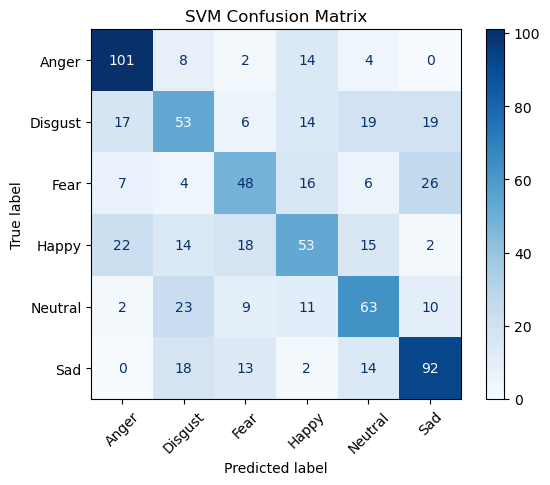

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels for your test set in a variable y_test
# Load the true labels for the test set from the original test data if available
# y_test = pd.read_csv(r'C:\Users\rakes\Desktop\Machinelearn\test_data_with_emotion_labels.csv')['emotion']  # Load actual labels

# Display the classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_test_svm, target_names=['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']))
print("Accuracy Score:", accuracy_score(y_test, y_test_svm))

# Plotting the confusion matrix
def plot_confusion_matrix(y_true, y_pred, label_names, classifier="SVM"):
    confusion_mat = confusion_matrix(y_true, y_pred, labels=label_names)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{classifier} Confusion Matrix")
    plt.xticks(rotation=45)
    plt.show()

# Define label names for the emotions
label_names = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']

# Plot the confusion matrix using the true labels and predictions
plot_confusion_matrix(y_test, y_test_svm, label_names=label_names, classifier="SVM")


In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load train and test data
train_csv = r'training_data_90.csv'
test_csv = r'test_data_10.csv'

# Load features and labels from train data
train_df = pd.read_csv(train_csv).drop(columns=['intensity'], errors='ignore')  # Drop 'intensity' if exists
test_df = pd.read_csv(test_csv).drop(columns=['intensity'], errors='ignore')

# Extract features and labels
X_train = train_df.drop(columns=['emotion']).values  # Drop 'emotion' column to get features
Y_train = train_df['emotion'].values  # Get labels
X_test = test_df.drop(columns=['emotion']).values if 'emotion' in test_df.columns else test_df.values

# Impute missing values with the mean for both train and test sets
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function for cross-validation with Random Forest
def cross_validate(X, y):
    model = RandomForestClassifier(n_estimators=800, random_state=42)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", scores)
    print("Mean Cross-Validation Score:", scores.mean())

# Cross-validate
cross_validate(X_train, Y_train)

# Train and predict
rf = RandomForestClassifier(n_estimators=800, random_state=42)
rf.fit(X_train, Y_train)
y_test_rf = rf.predict(X_test)

# Save predictions with IDs if available, else use index
if 'new_id' in test_df.columns:
    test_df['emotion'] = y_test_rf  # Add predictions
    output_df = test_df[['new_id', 'emotion']].rename(columns={"new_id": "id"})
else:
    output_df = pd.DataFrame({'id': test_df.index, 'emotion': y_test_rf})

output_df.to_csv(r'C:\Users\rakes\Desktop\Machinelearn\predict_rf_final.csv', index=False)
print("Predictions saved to 'predict_rf_final.csv'")


Cross-Validation Scores: [0.52761194 0.50746269 0.49663928 0.48693055 0.50037341]
Mean Cross-Validation Score: 0.5038035736180932
Predictions saved to 'predict_rf_final.csv'


Classification Report:
              precision    recall  f1-score   support

       Anger       0.63      0.82      0.71       129
     Disgust       0.49      0.34      0.40       128
        Fear       0.52      0.30      0.38       107
       Happy       0.43      0.46      0.45       124
     Neutral       0.49      0.53      0.51       118
         Sad       0.57      0.70      0.63       139

    accuracy                           0.53       745
   macro avg       0.52      0.52      0.51       745
weighted avg       0.52      0.53      0.52       745

Accuracy Score: 0.5329


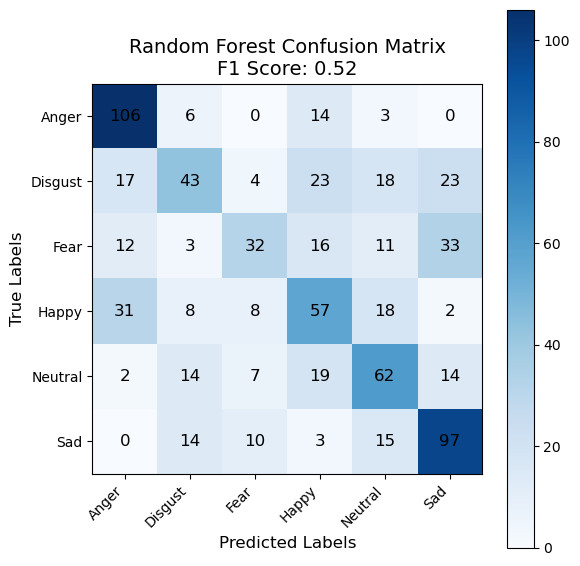

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Define a function to plot the confusion matrix with F1 score in the title
def plot_confusion_matrix_with_f1(y_true, y_pred, label_names, classifier="Random Forest"):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred, labels=label_names)
    
    # Calculate the F1 score (weighted) and accuracy score
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    
    # Display the classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=label_names))
    print(f"Accuracy Score: {accuracy:.4f}")
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(confusion_mat, cmap=plt.cm.Blues, interpolation='nearest')
    plt.title(f"{classifier} Confusion Matrix\nF1 Score: {f1:.2f}", fontsize=14)
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.xticks(np.arange(len(label_names)), label_names, rotation=45, ha='right')
    plt.yticks(np.arange(len(label_names)), label_names)
    plt.colorbar()

    # Display counts in each cell of the confusion matrix
    for (i, j), label in np.ndenumerate(confusion_mat):
        plt.text(j, i, label, ha='center', va='center', fontsize=12, color="black")
    
    plt.tight_layout()
    plt.show()

# Assuming `y_test` contains the true labels for the test set
# Load `y_test` if not already loaded from the `test_df`
y_test = test_df['emotion'].values  # True labels for the test set

# Plot the confusion matrix with F1 score
plot_confusion_matrix_with_f1(y_test, y_test_rf, label_names=['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad'], classifier="Random Forest")


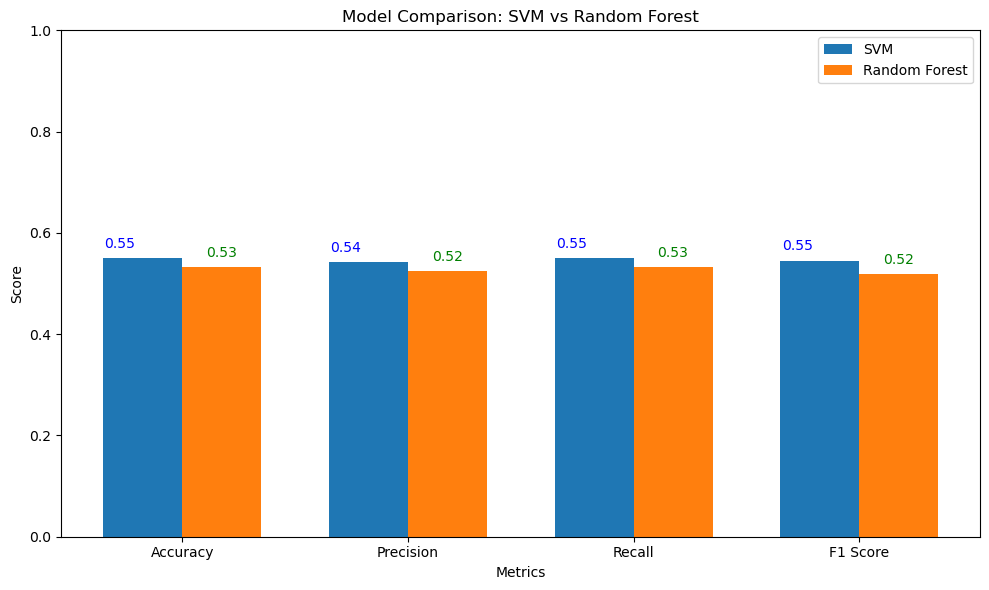

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for SVM
svm_accuracy = accuracy_score(y_test, y_test_svm)
svm_precision = precision_score(y_test, y_test_svm, average='weighted')
svm_recall = recall_score(y_test, y_test_svm, average='weighted')
svm_f1 = f1_score(y_test, y_test_svm, average='weighted')

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_test_rf)
rf_precision = precision_score(y_test, y_test_rf, average='weighted')
rf_recall = recall_score(y_test, y_test_rf, average='weighted')
rf_f1 = f1_score(y_test, y_test_rf, average='weighted')

# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics))

# Bars for SVM and Random Forest scores
bar1 = plt.bar(index, svm_scores, bar_width, label='SVM')
bar2 = plt.bar([i + bar_width for i in index], rf_scores, bar_width, label='Random Forest')

# Labeling
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison: SVM vs Random Forest')
plt.xticks([i + bar_width / 2 for i in index], metrics)
plt.ylim(0, 1)  # Assuming metrics are scaled between 0 and 1
plt.legend()

# Display values on top of bars
for i, (v1, v2) in enumerate(zip(svm_scores, rf_scores)):
    plt.text(i - 0.1, v1 + 0.02, f"{v1:.2f}", ha='center', color='blue')
    plt.text(i + bar_width, v2 + 0.02, f"{v2:.2f}", ha='center', color='green')

# Show plot
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
from scipy.stats import f_oneway

# Load the data (replace with your file path if needed)
file_path = 'audio_features_with_labels.csv'
data = pd.read_csv(file_path)

# Extract features and emotion labels
mfcc_features = data.filter(regex="^mfcc_")
emotion_labels = data["emotion"].unique()

# Results dictionary to store ANOVA results
anova_within_emotions_results = {"Emotion": [], "Feature_Group": [], "F-statistic": [], "p-value": []}

# Perform ANOVA within each emotion group
for emotion in emotion_labels:
    # Hypotheses for this emotion group
    print(f"\nAnalyzing Emotion Group: {emotion}")
    print("Null Hypothesis (H0): The mean values of all features are the same within this emotion group.")
    print("Alternative Hypothesis (H1): At least one feature has a different mean value within this emotion group.\n")
    
    # Subset data for the current emotion group
    emotion_data = data[data["emotion"] == emotion]
    emotion_features = emotion_data[mfcc_features.columns]
    
    # Transpose the features: rows represent features, columns represent instances
    transposed_emotion_features = emotion_features.T
    
    # Perform one-way ANOVA
    try:
        # Perform ANOVA across all features within this emotion group
        f_stat, p_value = f_oneway(*transposed_emotion_features.values)
        
        # Store results
        anova_within_emotions_results["Emotion"].append(emotion)
        anova_within_emotions_results["Feature_Group"].append("MFCC Features")
        anova_within_emotions_results["F-statistic"].append(f_stat)
        anova_within_emotions_results["p-value"].append(p_value)
        
        # Print results for this emotion group
        print(f"F-statistic: {f_stat}")
        print(f"p-value: {p_value}")
        if p_value < 0.05:
            print("Conclusion: Reject the null hypothesis. Significant differences exist among the features.\n")
        else:
            print("Conclusion: Fail to reject the null hypothesis. No significant differences among the features.\n")
    except Exception as e:
        # Handle any errors gracefully
        print(f"Error analyzing {emotion}: {e}")
        anova_within_emotions_results["Emotion"].append(emotion)
        anova_within_emotions_results["Feature_Group"].append("MFCC Features")
        anova_within_emotions_results["F-statistic"].append(None)
        anova_within_emotions_results["p-value"].append(None)

# Convert results to a DataFrame
anova_within_emotions_results_df = pd.DataFrame(anova_within_emotions_results)

# Save results to a CSV file (optional)
anova_within_emotions_results_df.to_csv("anova_within_emotions_results.csv", index=False)

# Display summary of all results
print("\nSummary of ANOVA Results Across All Emotion Groups:")
print(anova_within_emotions_results_df)



Analyzing Emotion Group: Anger
Null Hypothesis (H0): The mean values of all features are the same within this emotion group.
Alternative Hypothesis (H1): At least one feature has a different mean value within this emotion group.

F-statistic: 62922.05046818532
p-value: 0.0
Conclusion: Reject the null hypothesis. Significant differences exist among the features.


Analyzing Emotion Group: Disgust
Null Hypothesis (H0): The mean values of all features are the same within this emotion group.
Alternative Hypothesis (H1): At least one feature has a different mean value within this emotion group.

F-statistic: 87624.26938220189
p-value: 0.0
Conclusion: Reject the null hypothesis. Significant differences exist among the features.


Analyzing Emotion Group: Fear
Null Hypothesis (H0): The mean values of all features are the same within this emotion group.
Alternative Hypothesis (H1): At least one feature has a different mean value within this emotion group.

F-statistic: 62222.040920505475
p-va